#Predicting Survival and Gender on the Titanic: A Classification Analysis

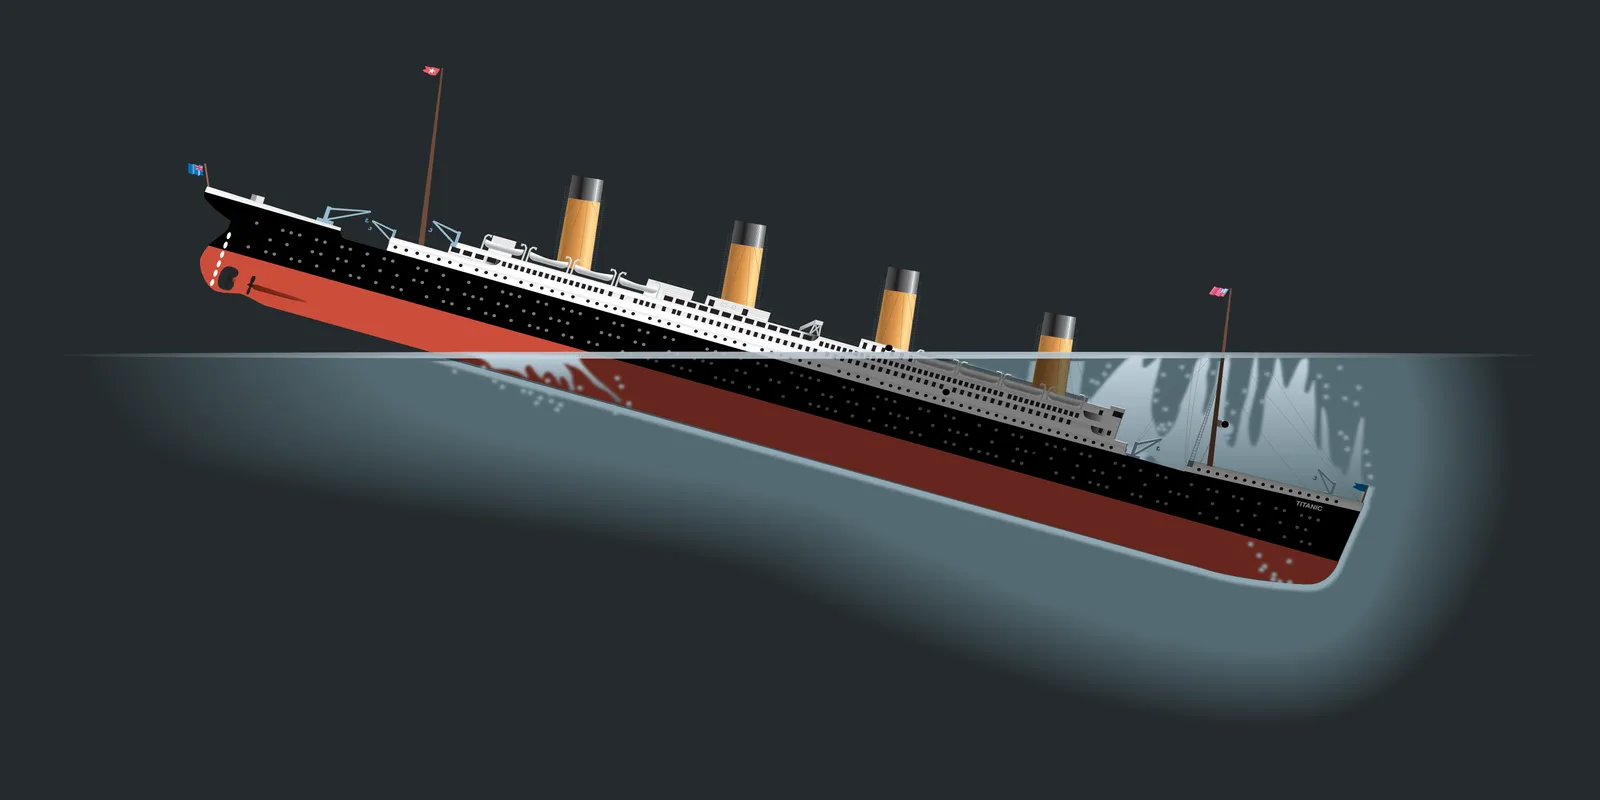

In [103]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve

from sklearn.ensemble import RandomForestClassifier


In [104]:
df=pd.read_csv('/content/titanic_data.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [105]:
print(set(df['Pclass']))
print(set(df['Embarked']))

{1, 2, 3}
{'S', 'Q', 'C', nan}


In [106]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [107]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [108]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Here's an explanation of each column in the Titanic dataset:

1. **PassengerId**: A unique identifier assigned to each passenger. It is an 'int64' data type. There is no null value.

2. **Survived**: This is the target variable. It indicates whether a passenger survived (1) or did not survive (0). It is an 'int64' data type. There is no null value.

3. **Pclass**: The passenger's class (1st, 2nd, or 3rd). It can be considered as a proxy for socio-economic status, with 1st class being higher. It is an 'int64' data type. There is no null value.

4. **Name**: The name of the passenger. It is an 'object' data type. There is no null value.

5. **Sex**: The gender of the passenger (male or female). It is an 'object' data type. There is no null value.

6. **Age**: The age of the passenger. It is represented in years. It is a 'float64' data type. There are 177 null values.

7. **SibSp**: The number of siblings or spouses the passenger had aboard the Titanic. It is an 'int64' data type. There is no null value.

8. **Parch**: The number of parents or children the passenger had aboard the Titanic. It is an 'int64' data type. There is no null value.

9. **Ticket**: The ticket number. It is an 'object' data type. There is no null value.

10. **Fare**: The amount of money the passenger paid for the ticket. It is a 'float64' data type. There is no null value.

11. **Cabin**: The cabin number where the passenger stayed. This information may have missing values. It is an 'object' data type. There are 687 null values.

12. **Embarked**: The port where the passenger boarded the Titanic (C = Cherbourg, Q = Queenstown, S = Southampton). It is an 'object' data type. There are 2 null values.

In [109]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
28.0


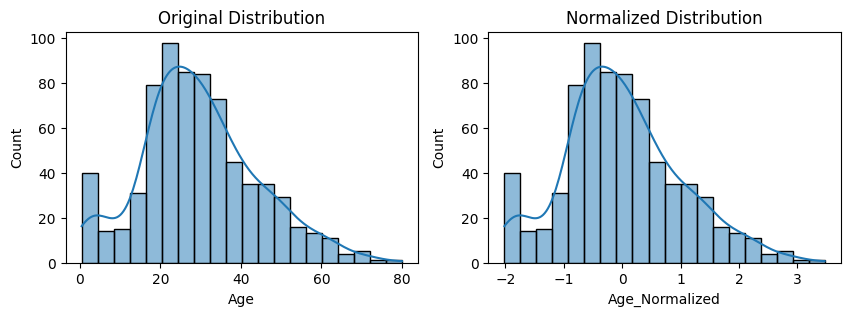

In [110]:
# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the 'Age' column to be a 2D array (required by StandardScaler)
age_values = df['Age'].values.reshape(-1, 1)

# Fit the scaler to the data and transform the 'Age' column
df['Age_Normalized'] = scaler.fit_transform(age_values)

# Plot the original and normalized distributions
plt.figure(figsize=(10, 3))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Age_Normalized'], kde=True)
plt.title('Normalized Distribution')

plt.show()


The 'Age' column exhibits a positive skewness, as evidenced by its deviation from a normal distribution, with both the mean and median values being greater than the mode. Additionally, the dataset contains some null values in the 'Age' column. To address this, the null values are replaced with the mean age, contributing to the mitigation of the positive skewness within the distribution.

In [111]:
# Impute missing Age values with the median
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [112]:
print(df['Age'].mean())
print(df['Age'].median())

29.69911764705882
29.69911764705882


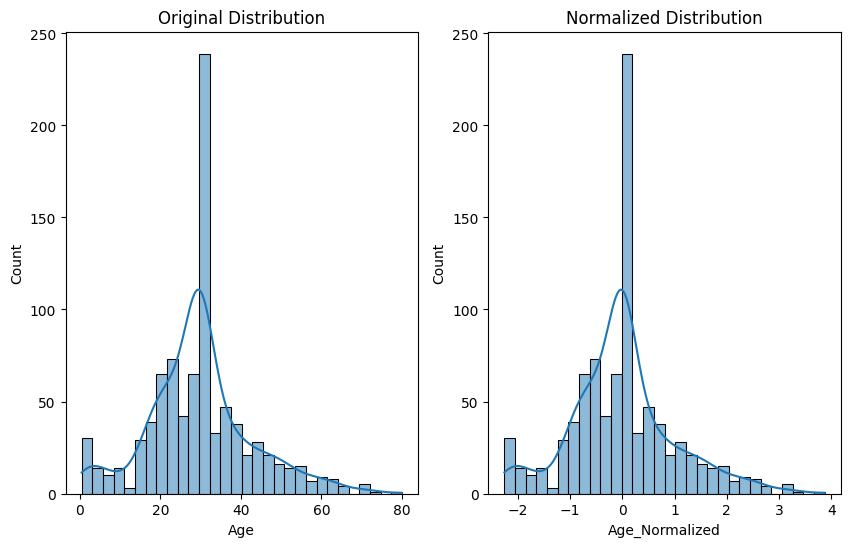

In [113]:
# Create a StandardScaler object
scaler = StandardScaler()

# Reshape the 'Age' column to be a 2D array (required by StandardScaler)
age_values = df['Age'].values.reshape(-1, 1)

# Fit the scaler to the data and transform the 'Age' column
df['Age_Normalized'] = scaler.fit_transform(age_values)

# Plot the original and normalized distributions
plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True)
plt.title('Original Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['Age_Normalized'], kde=True)
plt.title('Normalized Distribution')

plt.show()

Following the imputation of null values in the 'Age' column with the mean, the distribution has transformed into a normal distribution. Notably, this normalization is reflected in the convergence of the mean and median values, both of which now align, indicating a symmetrical distribution.

In [114]:
df.isnull().sum()

PassengerId         0
Survived            0
Pclass              0
Name                0
Sex                 0
Age                 0
SibSp               0
Parch               0
Ticket              0
Fare                0
Cabin             687
Embarked            2
Age_Normalized      0
dtype: int64

The 'Cabin' column contains 687 null values, while the 'Embarked' column has 2 null values. As these columns are not essential for predicting our target variable, they are being dropped from the dataset to streamline the analysis and modeling process.

In [115]:
# Drop the 'Cabin' and 'Embarked' and 'PassengerId'columns
df = df.drop(['Cabin', 'Embarked','PassengerId'], axis=1)

In [116]:
df.isnull().sum()

Survived          0
Pclass            0
Name              0
Sex               0
Age               0
SibSp             0
Parch             0
Ticket            0
Fare              0
Age_Normalized    0
dtype: int64

After addressing the missing values in the dataset by replacing null values in the 'Age' column with the mean and subsequently dropping the 'Cabin' and 'Embarked' columns, the dataset is now devoid of any null values. This data preparation process ensures a more complete and standardized dataset for further analysis and modeling.

In [117]:
print(set(df['Survived']))

{0, 1}


The 'Survived' column contains binary data, with '0' denoting instances where individuals did not survive and '1' indicating instances where individuals survived.

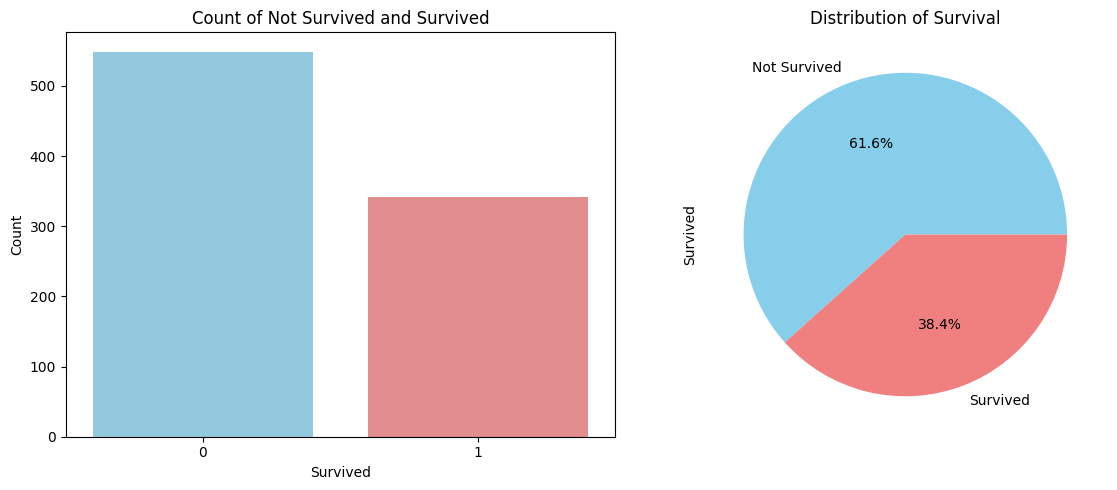

In [118]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))

# Count plot
sns.countplot(x='Survived', data=df, palette=['skyblue', 'lightcoral'], ax=axes[0])
axes[0].set_title('Count of Not Survived and Survived')
axes[0].set_xlabel('Survived')
axes[0].set_ylabel('Count')

# Pie plot
df['Survived'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Not Survived', 'Survived'], colors=['skyblue', 'lightcoral'], ax=axes[1])
axes[1].set_title('Distribution of Survival')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [119]:
print(f'0 count: {(df["Survived"] == 0).sum()}')
print(f'1 count: {(df["Survived"] == 1).sum()}')

0 count: 549
1 count: 342


The 'Survived' column reveals that out of the total instances, 549 are labeled as '0' (indicating not survived), constituting 61.6%, while 342 instances are labeled as '1' (indicating survived), representing 38.4% of the dataset.

In [120]:
(set(df['Pclass']))

{1, 2, 3}

The 'Pclass' column encompasses three distinct types of data, representing the passenger classes on the Titanic. These classes are designated as follows:

1. **Class 1 (Pclass = 1):** First-class passengers, typically indicative of a higher socio-economic status.

2. **Class 2 (Pclass = 2):** Second-class passengers.

3. **Class 3 (Pclass = 3):** Third-class passengers, often associated with a relatively lower socio-economic status.

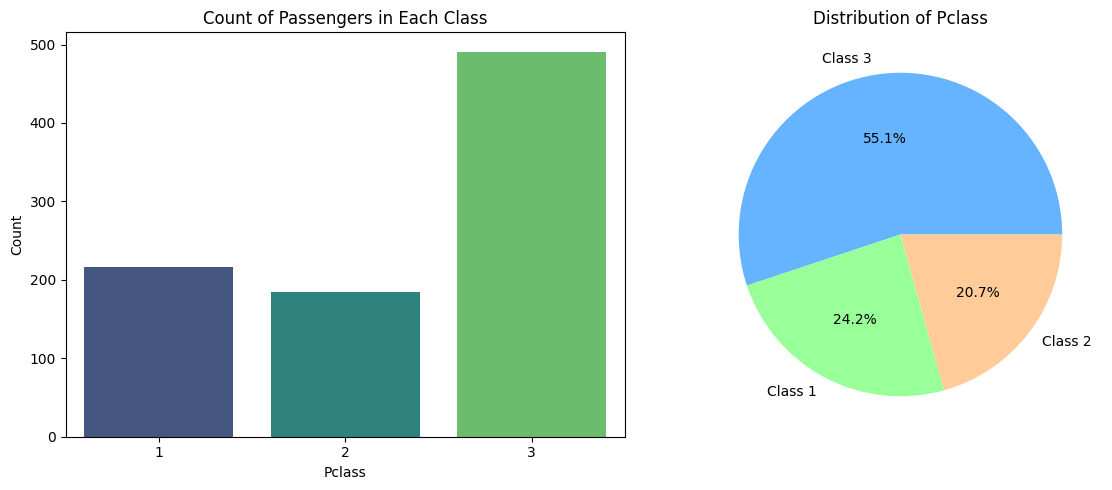

In [121]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Count plot for Pclass
sns.countplot(x='Pclass', data=df, palette='viridis', ax=axes[0])
axes[0].set_title('Count of Passengers in Each Class')
axes[0].set_xlabel('Pclass')
axes[0].set_ylabel('Count')

# Pie chart for distribution of Pclass
class_counts = df['Pclass'].value_counts()
axes[1].pie(class_counts, labels=['Class 3', 'Class 1', 'Class 2'], autopct='%1.1f%%', colors=['#66b3ff', '#99ff99', '#ffcc99'])
axes[1].set_title('Distribution of Pclass')

# Adjust layout to prevent overlapping
fig.tight_layout()

# Show the plots
plt.show()


In [122]:
print(f'1 count: {(df["Pclass"] == 1).sum()}')
print(f'2 count: {(df["Pclass"] == 2).sum()}')
print(f'3 count: {(df["Pclass"] == 3).sum()}')

1 count: 216
2 count: 184
3 count: 491



The distribution of passengers based on the 'Pclass' column is as follows:

1. **Class 1:** There are a total of 216 passengers in this class, constituting 24.2% of the total passenger count.

2. **Class 2:** There are 184 passengers in this class, making up 20.7% of the total number of passengers.

3. **Class 3:** The largest class, with 491 passengers, represents 55.1% of the total number of passengers.

These percentages provide a breakdown of the socio-economic distribution among the passengers in different classes on the Titanic.

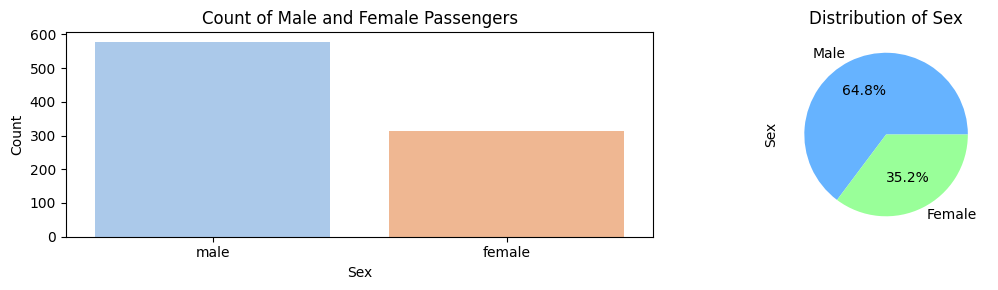

In [123]:
# Set up a 1x2 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 3))

# Count plot for Sex
sns.countplot(x='Sex', data=df, palette='pastel', ax=axes[0])
axes[0].set_title('Count of Male and Female Passengers')
axes[0].set_xlabel('Sex')
axes[0].set_ylabel('Count')

# Pie chart for distribution of Sex
df['Sex'].value_counts().plot.pie(autopct='%1.1f%%', labels=['Male', 'Female'], colors=['#66b3ff','#99ff99'], ax=axes[1])
axes[1].set_title('Distribution of Sex')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


In [124]:
print(f"Total Male: {(df['Sex'] == 'male').sum()}")
print(f"Total Female: {(df['Sex'] == 'female').sum()}")


Total Male: 577
Total Female: 314


"In the 'Sex' column, there are a total of 577 males, representing 64.8% of the data, and 314 females, accounting for 35.2% of the dataset."

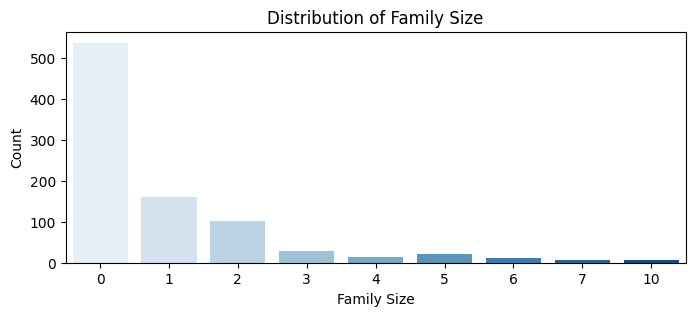

In [125]:
# Explore the distribution of family size (SibSp + Parch)
df['Family_Size'] = df['SibSp'] + df['Parch']

# Set up a single subplot
fig, axes = plt.subplots(figsize=(8, 3))

# Countplot or Bar plot for Family Size
sns.countplot(x='Family_Size', data=df, palette='Blues', ax=axes)
axes.set_title('Distribution of Family Size')
axes.set_xlabel('Family Size')
axes.set_ylabel('Count')

# Show the plot
plt.show()



The bar chart displaying the distribution of family sizes (calculated as the sum of 'SibSp' and 'Parch') reveals that the highest count corresponds to single individuals, totaling nearly 550. Family sizes of 1 are the next most common, with approximately 180 instances, followed by family sizes of 2, which occur around 110 times. Family sizes of 3 are observed in nearly 40 cases, while family sizes of 4 and 5 are found in approximately 20 and 30 instances, respectively. Larger family sizes of 6 and 7 are less common, each appearing around 20 and 10 times, respectively. The largest family size of 10 is also observed around 10 times.

<ipython-input-126-f71f2a5a7e76>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fare'], ax=axes[2], shade=True, color='salmon')


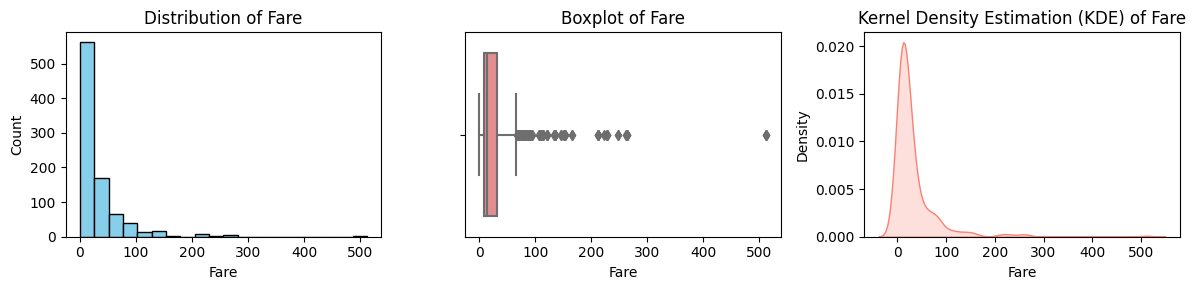

In [126]:
# Set up a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

# Histogram for Fare
axes[0].hist(df['Fare'], bins=20, edgecolor='black', color='skyblue')
axes[0].set_title('Distribution of Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

# Box plot for Fare
sns.boxplot(x='Fare', data=df, ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot of Fare')
axes[1].set_xlabel('Fare')

# KDE plot for Fare
sns.kdeplot(df['Fare'], ax=axes[2], shade=True, color='salmon')
axes[2].set_title('Kernel Density Estimation (KDE) of Fare')
axes[2].set_xlabel('Fare')
axes[2].set_ylabel('Density')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()


The distribution of the 'Fare' column is positively skewed, indicating that the majority of fares are clustered towards the lower end, and there are relatively few very high fares. Additionally, when examining the box plot for 'Fare,' it becomes apparent that there are outliers present in the data, suggesting the presence of some unusually high fare values.

In [127]:
# Calculate the IQR (Interquartile Range) for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'Fare' column: {total_outliers}")


Total number of outliers in 'Fare' column: 116


In the 'Fare' column, there are a total of 116 outliers, which are values that fall significantly outside the normal range of fares.

In [128]:
# Calculate quartiles
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df= df[(df['Fare'] >= lower_bound) & (df['Fare'] <= upper_bound)]

# Display the DataFrame without outliers
print("DataFrame without outliers:")
print(len(df))

DataFrame without outliers:
775


After removing the outliers, the dataset now contains 775 rows in the 'Fare' column.

In [129]:
# Calculate the IQR (Interquartile Range) for 'Fare'
Q1 = df['Fare'].quantile(0.25)
Q3 = df['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Define the upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Count the outliers
outliers = df[(df['Fare'] < lower_bound) | (df['Fare'] > upper_bound)]
total_outliers = len(outliers)

print(f"Total number of outliers in 'Fare' column: {total_outliers}")

Total number of outliers in 'Fare' column: 25


After removing the initial outliers, there are still 25 remaining outliers in the 'Fare' column.

<ipython-input-130-f71f2a5a7e76>:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['Fare'], ax=axes[2], shade=True, color='salmon')


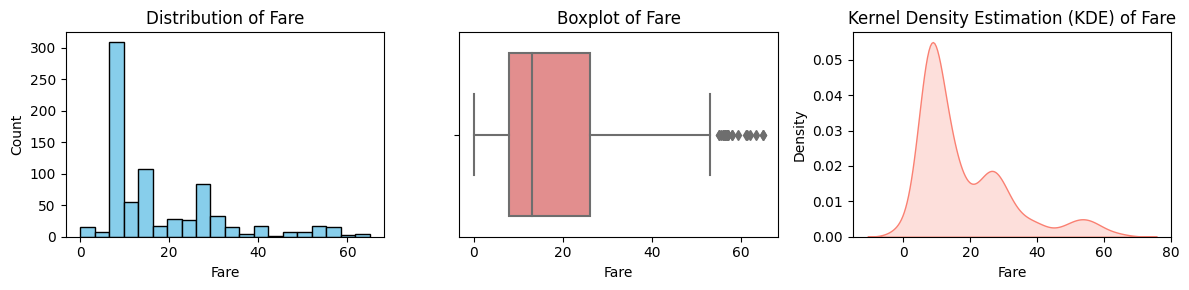

In [130]:
# Set up a 1x3 grid of subplots
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(12, 3))

# Histogram for Fare
axes[0].hist(df['Fare'], bins=20, edgecolor='black', color='skyblue')
axes[0].set_title('Distribution of Fare')
axes[0].set_xlabel('Fare')
axes[0].set_ylabel('Count')

# Box plot for Fare
sns.boxplot(x='Fare', data=df, ax=axes[1], color='lightcoral')
axes[1].set_title('Boxplot of Fare')
axes[1].set_xlabel('Fare')

# KDE plot for Fare
sns.kdeplot(df['Fare'], ax=axes[2], shade=True, color='salmon')
axes[2].set_title('Kernel Density Estimation (KDE) of Fare')
axes[2].set_xlabel('Fare')
axes[2].set_ylabel('Density')

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plots
plt.show()

The removal of outliers has significantly improved the visual quality of the graphs and has resulted in a more balanced and better-looking distribution compared to the initial dataset.

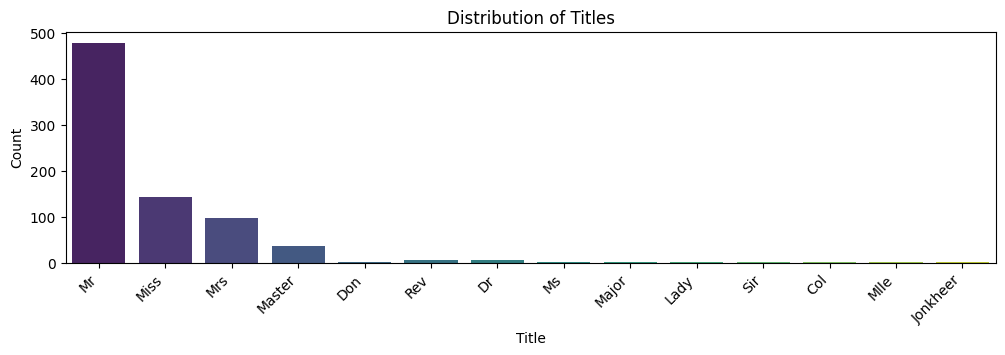

In [131]:
# Extract titles from the 'Name' column
df['Title'] = df['Name'].apply(lambda x: x.split(',')[1].split('.')[0].strip())

# Set up a subplot for the distribution of titles
plt.figure(figsize=(12, 3))
sns.countplot(x='Title', data=df, palette='viridis')
plt.title('Distribution of Titles')
plt.xlabel('Title')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show the plot
plt.show()


In [132]:
title_counts = df['Title'].value_counts()
print(title_counts)


Mr          478
Miss        143
Mrs          97
Master       36
Rev           6
Dr            5
Major         2
Col           2
Don           1
Ms            1
Lady          1
Sir           1
Mlle          1
Jonkheer      1
Name: Title, dtype: int64


In the 'Name' column, there are 14 distinct name titles. The most common title is 'Mr' with 478 occurrences, followed by 'Miss' with 143 occurrences and 'Mrs' with 97 occurrences. 'Master' is the fourth most common title with 36 occurrences, while 'Rev' and 'Dr' follow with 6 and 5 occurrences, respectively. 'Major' and 'Col' share the seventh position with 2 occurrences each, while the titles 'Don,' 'Ms,' 'Lady,' 'Sir,' 'Mlle,' and 'Jonkheer' are the least common, each appearing only once in the dataset.

In [133]:
le = LabelEncoder()
df['Sex_encoded'] = le.fit_transform(df['Sex'])


In [134]:
df= pd.get_dummies(df, columns=['Sex'], prefix='Sex')
df.head(1)

,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Age_Normalized,Family_Size,Title,Sex_encoded,Sex_female,Sex_male
0,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.25,-0.592481,1,Mr,1,0,1


In [135]:
df.columns

Index(['Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare',
       'Age_Normalized', 'Family_Size', 'Title', 'Sex_encoded', 'Sex_female',
       'Sex_male'],
      dtype='object')

After label encoding the 'Sex' column, the resulting dataset includes the following columns: 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Age_Normalized', 'Family_Size', 'Title', 'Sex_encoded', 'Sex_female', and 'Sex_male'.

In [136]:
columns_to_drop = ['Name','Ticket','Age_Normalized', 'Family_Size', 'Title','Sex_female',
       'Sex_male']

columns_to_drop_existing = [col for col in columns_to_drop if col in df.columns]
df= df.drop(columns=columns_to_drop_existing, inplace=False)
df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_encoded
0,0,3,22.0,1,0,7.250,1
2,1,3,26.0,0,0,7.925,0


After label encoding the 'Sex' column, some unnecessary columns have been dropped from the dataset. The remaining columns are 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_encoded'.

#To build a classification model to predict the survival status ('Survived') of individuals. This model will be trained using the available features and the target variable 'Survived'.

In [137]:
X_s= df[['Pclass', 'Sex_encoded', 'Age', 'SibSp', 'Parch', 'Fare']]
y_s = df['Survived']

#1. Logistic Regression Model

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       127
           1       0.69      0.60      0.64        67

    accuracy                           0.77       194
   macro avg       0.75      0.73      0.73       194
weighted avg       0.76      0.77      0.76       194



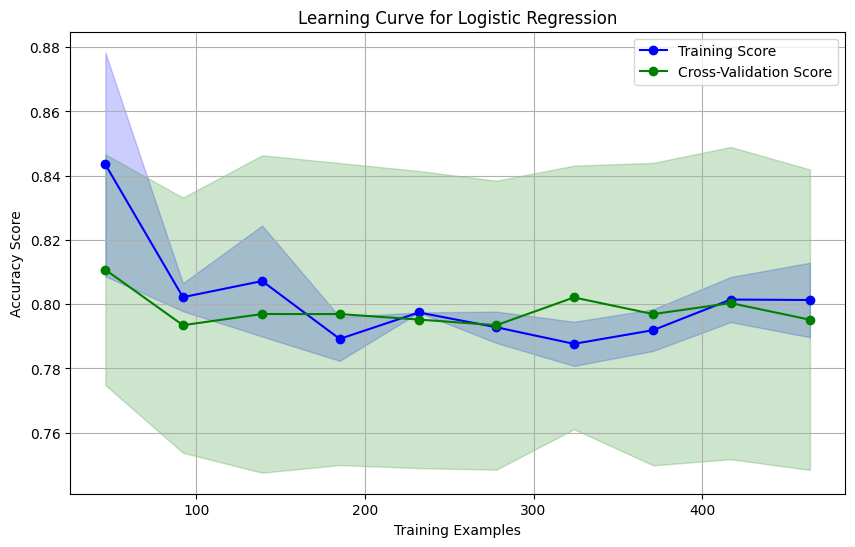

In [138]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.25, random_state=3)

# Standardize the features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The model achieved an accuracy of 77%, and the learning curve demonstrates a perfect fit.

#2. Support Vector Machines

              precision    recall  f1-score   support

           0       0.84      0.86      0.85        99
           1       0.74      0.71      0.73        56

    accuracy                           0.81       155
   macro avg       0.79      0.79      0.79       155
weighted avg       0.81      0.81      0.81       155



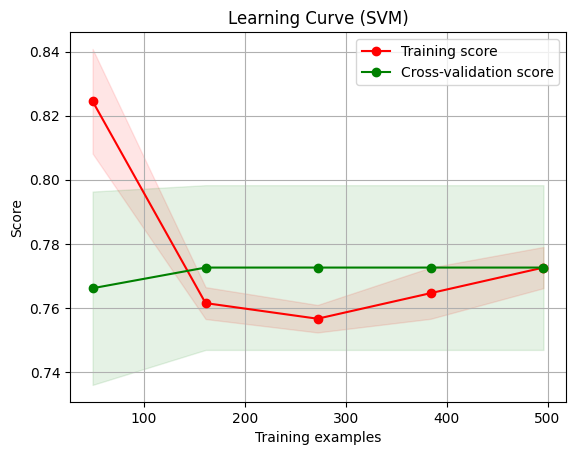

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.2, random_state=50)


svm_model = SVC(kernel='linear', C=3)
#svm_model = SVC()

svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve (SVM)"
plot_learning_curve(svm_model, title, X_train, y_train, cv=5)
plt.show()


In the case of Support Vector Machines (SVM), the accuracy is higher at 81%, but the learning curve indicates that the model is overfitting. So it is not perfect fit model.

#3. Random Forest

              precision    recall  f1-score   support

           0       0.87      0.85      0.86       163
           1       0.67      0.70      0.69        70

    accuracy                           0.81       233
   macro avg       0.77      0.78      0.77       233
weighted avg       0.81      0.81      0.81       233



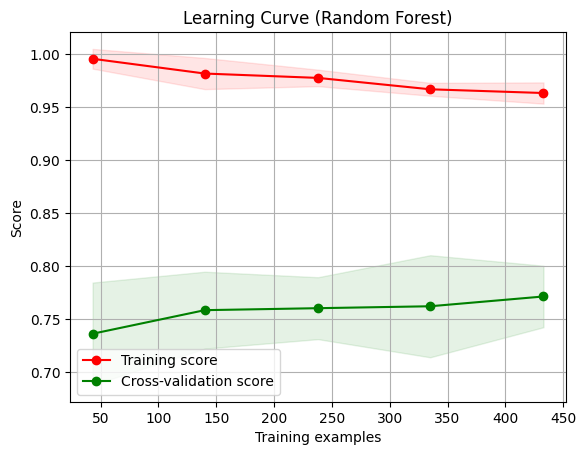

In [140]:
X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=4)

rf_model = RandomForestClassifier(n_estimators=10, random_state=4)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve (Random Forest)"
plot_learning_curve(rf_model, title, X_train, y_train, cv=5)
plt.show()


In the case of Random Forest, the accuracy is higher at 81%, but the learning curve indicates that the model is overfitting. So it is not perfect fit model.

#To build a classification model to predict the sex status ('Sex_encoded') of individuals. This model will be trained using the available features and the target variable 'Sex_encoded'.

In [141]:
X_sex= df[['Survived','Pclass', 'Age', 'SibSp', 'Parch', 'Fare']]
y_sex = df['Sex_encoded']

#1. Logistic Regression

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.52      0.57        56
           1       0.82      0.88      0.85       138

    accuracy                           0.77       194
   macro avg       0.72      0.70      0.71       194
weighted avg       0.76      0.77      0.77       194



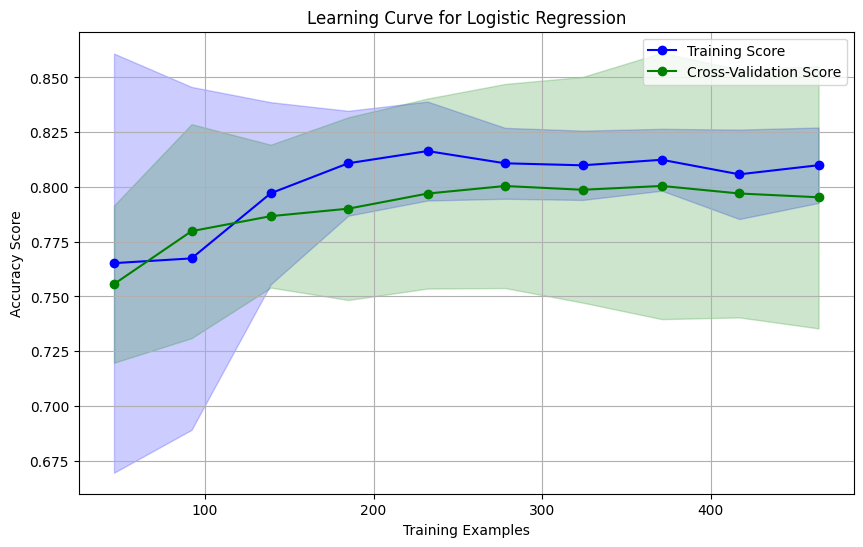

In [142]:

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_sex, y_sex, test_size=0.25, random_state=6)

# Standardize the features (optional but can be beneficial for logistic regression)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create a logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Display classification report
class_report = classification_report(y_test, y_pred)
print('Classification Report:\n', class_report)

# Create a learning curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, train_sizes=np.linspace(0.1, 1.0, 10), scoring='accuracy')

# Calculate mean and standard deviation of training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, label='Training Score', color='blue', marker='o')
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color='blue', alpha=0.2)
plt.plot(train_sizes, test_mean, label='Cross-Validation Score', color='green', marker='o')
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color='green', alpha=0.2)

plt.title('Learning Curve for Logistic Regression')
plt.xlabel('Training Examples')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.grid(True)
plt.show()

The model achieved an accuracy of 77%, and the learning curve demonstrates a perfect fit.

#2. Support Vector Machines

              precision    recall  f1-score   support

           0       0.71      0.71      0.71        75
           1       0.86      0.86      0.86       158

    accuracy                           0.81       233
   macro avg       0.78      0.78      0.78       233
weighted avg       0.81      0.81      0.81       233



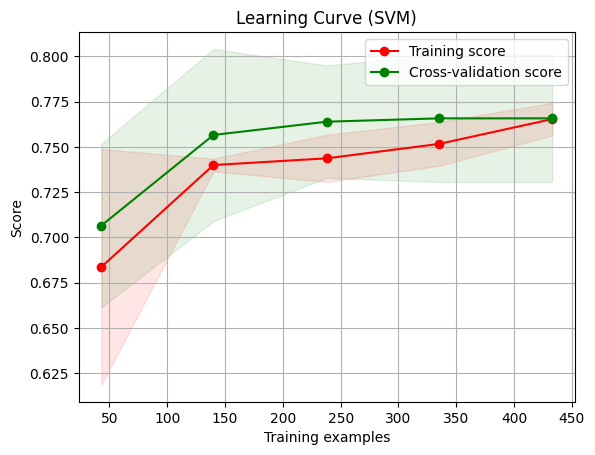

In [143]:
X_train, X_test, y_train, y_test = train_test_split(X_sex, y_sex, test_size=0.3, random_state=50)


svm_model = SVC(kernel='linear', C=3)
#svm_model = SVC()
svm_model.fit(X_train, y_train)


y_pred = svm_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)


def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve (SVM)"
plot_learning_curve(svm_model, title, X_train, y_train, cv=5)
plt.show()


In the case of Support Vector Machines (SVM), the accuracy is higher at 81%, but the learning curve indicates that the model is overfitting. So it is not perfect fit model.

              precision    recall  f1-score   support

           0       0.68      0.65      0.66        68
           1       0.86      0.87      0.86       165

    accuracy                           0.81       233
   macro avg       0.77      0.76      0.76       233
weighted avg       0.80      0.81      0.81       233



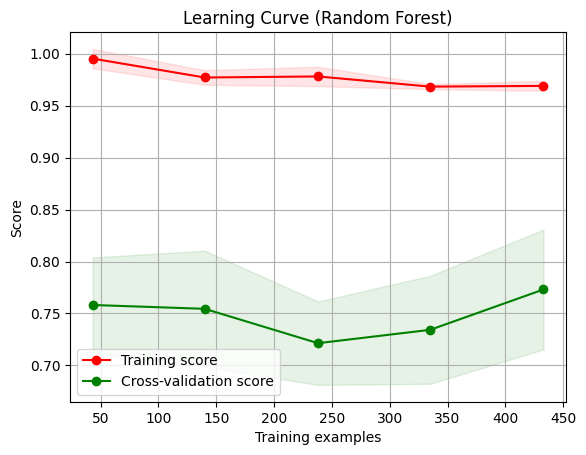

In [144]:
X_train, X_test, y_train, y_test = train_test_split(X_sex, y_sex, test_size=0.3, random_state=4)

rf_model = RandomForestClassifier(n_estimators=10, random_state=4)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

title = "Learning Curve (Random Forest)"
plot_learning_curve(rf_model, title, X_train, y_train, cv=5)
plt.show()


In the case of Random Forest, the accuracy is higher at 81%, but the learning curve indicates that the model is overfitting. So it is not perfect fit model.

#conclusion

In the case of both Random Forest and Support Vector Machines (SVM), while the accuracy reached a high 81%, the learning curves revealed signs of overfitting, suggesting that these models may not be a perfect fit for the data. On the other hand, the model with an accuracy of 77% displayed a learning curve indicative of a better fit. Therefore, careful consideration should be given to model selection and parameter tuning to balance accuracy and model generalization.